# Importar Recursos

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = load_dataset("simonMadec/VegAnn")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/3775 [00:00<?, ? examples/s]

# Obtención de datos

In [4]:
# Selección de imágenes
X_imgs = dataset['train'][:100]['image']

In [5]:
# Convertir imágenes a Numpy array
X_imgs = [np.array(img) for img in X_imgs]

In [6]:
# Convertir imágenes a forma RGB
X_imgs_rgb = [img.reshape(-1,3) for img in X_imgs]

# Segmentación por KMeans

In [7]:
from sklearn.cluster import KMeans

In [16]:
r,g,b = np.array([0,1,2])

In [238]:
def is_green(color):
    R, G, B = color
    r_crit = R < G #0.8
    b_crit = B < G #0.64
    return (r_crit + b_crit) / 2

def is_green2(color):
    R, G, B = color
    r_crit = R < 0.8*G #0.8
    b_crit = B < 0.64*G #0.64
    return (r_crit + b_crit) / 2

def is_green3(color):
    R, G, B = color
    r_crit = R < G #0.8
    b_crit = B < G #0.64
    return (r_crit and b_crit)

def is_green4(color):
    R, G, B = color
    r_crit = R <0.8* G #0.8
    b_crit = B <0.64* G #0.64
    return (r_crit and b_crit)

In [342]:
def green_scores(model, image_rgb):
    green_sc = []
    for cat in np.unique(model.labels_):
        X_cat = image_rgb[model.labels_ == cat]
        scores = np.fromiter((is_green(pix) for pix in X_cat), np.float64)
        green_sc.append(scores.mean())
    return green_sc

def green_scores2(model, image_rgb):
    green_sc = []
    for cat in np.unique(model.labels_):
        X_cat = image_rgb[model.labels_ == cat]
        scores = np.fromiter((is_green2(pix) for pix in X_cat), np.float64)
        green_sc.append(scores.mean())
    return green_sc

def green_scores3(model, image_rgb):
    green_sc = []
    for cat in np.unique(model.labels_):
        X_cat = image_rgb[model.labels_ == cat]
        scores = np.fromiter((is_green3(pix) for pix in X_cat), np.float64)
        green_sc.append(scores.mean())
    return green_sc

def green_scores4(model, image_rgb):
    green_sc = []
    for cat in np.unique(model.labels_):
        X_cat = image_rgb[model.labels_ == cat]
        scores = np.fromiter((is_green4(pix) for pix in X_cat), np.float64)
        green_sc.append(scores.mean())
    return green_sc


def green_scores3b(model, image_rgb):
    green_sc = []
    for cat in np.unique(model.labels_):
        X_cat = image_rgb[model.labels_ == cat]
        scores = np.fromiter((is_green3(pix) for pix in X_cat), np.float64)
        green_sc.append(scores.sum())
    return green_sc

def green_scores4b(model, image_rgb):
    green_sc = []
    for cat in np.unique(model.labels_):
        X_cat = image_rgb[model.labels_ == cat]
        scores = np.fromiter((is_green4(pix) for pix in X_cat), np.float64)
        green_sc.append(scores.sum())
    return green_sc

def lighter_score(model, image_rgb):
    green_sc = []
    for cat in np.unique(model.labels_):
        X_cat = image_rgb[model.labels_ == cat]
        scores = X_cat.shape[0]
        green_sc.append(scores)
    return green_sc

In [331]:
# Numero de agrupamientos a formar
clusters = 6
model = KMeans(n_clusters=clusters, n_init='auto')

In [332]:
# Ajustando el modelo a la imagen
n = 29
model.fit(X_imgs_rgb[n])

KMeans(n_clusters=6, n_init='auto')

array([[[ 24,  22,   0],
        [ 16,  16,   0],
        [ 63,  67,  32],
        ...,
        [ 93,  93,  81],
        [ 63,  64,  50],
        [ 31,  29,  16]],

       [[ 24,  22,   0],
        [ 24,  22,   0],
        [ 92,  93,  61],
        ...,
        [ 71,  74,  53],
        [ 36,  38,  16],
        [ 15,  18,   0]],

       [[ 12,  12,   0],
        [ 10,  10,   0],
        [ 70,  71,  40],
        ...,
        [ 48,  56,  19],
        [ 48,  55,  14],
        [ 50,  57,  13]],

       ...,

       [[107, 129,  64],
        [ 96, 122,  49],
        [ 79, 107,  32],
        ...,
        [  8,   8,   6],
        [  7,   9,   4],
        [  5,   7,   2]],

       [[101, 124,  52],
        [ 93, 120,  41],
        [ 84, 113,  31],
        ...,
        [  7,   8,   3],
        [  6,   7,   2],
        [  7,   8,   3]],

       [[ 83, 105,  33],
        [ 80, 107,  26],
        [ 86, 116,  30],
        ...,
        [  9,   8,   3],
        [  8,   7,   2],
        [  8,   9,   4]]], dtype=uint8)
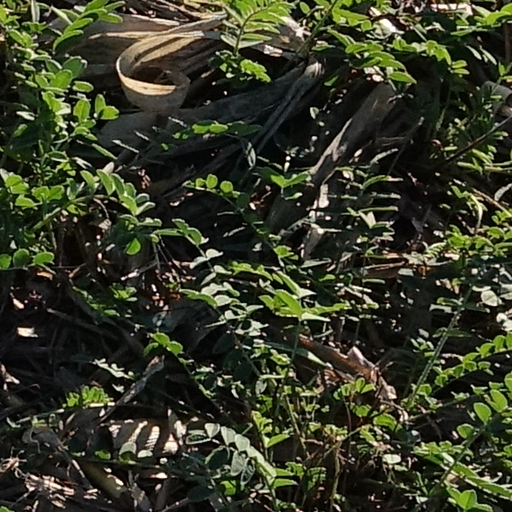

In [333]:
X_imgs[n]#.covert('L')

In [343]:
# Score de nivel de verde
gr_s = green_scores(model, X_imgs_rgb[n])
gr_s2 = green_scores2(model, X_imgs_rgb[n])
gr_s3 = green_scores3(model, X_imgs_rgb[n])
gr_s4 = green_scores4(model, X_imgs_rgb[n])
gr_s3b = green_scores3b(model, X_imgs_rgb[n])
gr_s4b = green_scores4b(model, X_imgs_rgb[n])
gr_s5 = lighter_score(model, X_imgs_rgb[n])
n_cluster = np.array(gr_s).argmax()

In [344]:
print(np.array(gr_s).argmax(), gr_s)
print(np.array(gr_s2).argmax(), gr_s2)
print(np.array(gr_s3).argmax(), gr_s3)
print(np.array(gr_s4).argmax(), gr_s4)
print(np.array(gr_s3b).argmax(), gr_s3b)
print(np.array(gr_s4b).argmax(), gr_s4b)
print(np.array(gr_s5).argmax(), gr_s5)

0 [0.4982835628068362, 0.4655626412348232, 0.49755638140813524, 0.49224876892212294, 0.4972565719433298, 0.4830790252789797]
1 [0.2759034365656491, 0.32303994791068213, 0.10869011861731914, 0.1632166089123959, 0.0038489886168208993, 0.19977985272906704]
0 [0.7608061717913698, 0.5592324485809491, 0.6513770808939572, 0.5666605872697429, 0.44075014331340595, 0.5902072420860852]
1 [0.16429810638219336, 0.25, 0.0005599959273023469, 0.12705939570794578, 0.0, 0.16705382221210052]
1 [20611.0, 58404.0, 12795.0, 18642.0, 5382.0, 38874.0]
1 [4451.0, 26109.0, 11.0, 4180.0, 0.0, 11003.0]
1 [27091, 104436, 19643, 32898, 12211, 65865]


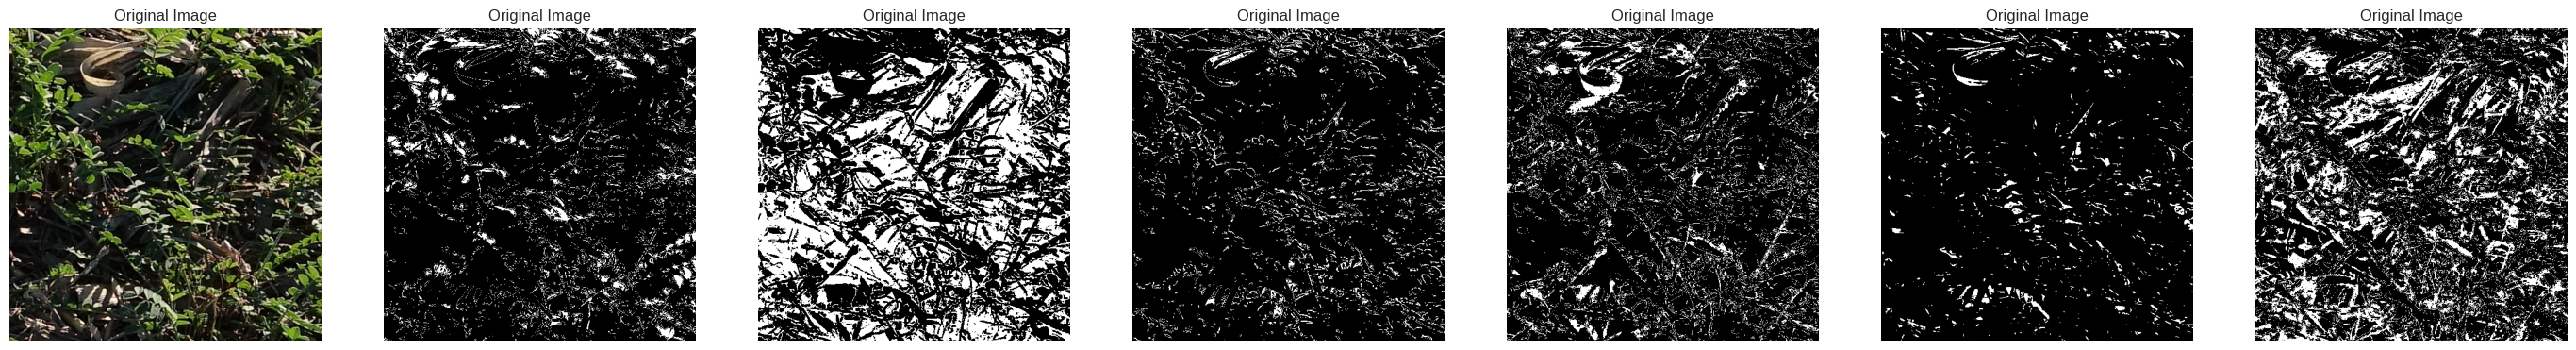

In [345]:
fig, axs = plt.subplots(1, 1 + clusters, figsize=(5+5*clusters, 5+5*clusters))

axs[0].imshow(X_imgs[n])
axs[0].set_title('Original Image')
axs[0].axis('off')

for k in range(1, clusters+1):
    axs[k].imshow((model.labels_ == k-1).reshape(X_imgs[n].shape[0], X_imgs[n].shape[1]), cmap='gray', vmin=0, vmax=1)
    axs[k].set_title('Original Image')
    axs[k].axis('off')

# axs[2].imshow((model.labels_ == 1).reshape(X_imgs[n].shape[0], X_imgs[n].shape[1]), cmap='gray', vmin=0, vmax=1)
# axs[2].set_title('Original Image')
# axs[2].axis('off')

# axs[3].imshow((model.labels_ == 2).reshape(X_imgs[n].shape[0], X_imgs[n].shape[1]), cmap='gray', vmin=0, vmax=1)
# axs[3].set_title('Original Image')
# axs[3].axis('off')

# axs[4].imshow((model.labels_ == 3).reshape(X_imgs[n].shape[0], X_imgs[n].shape[1]), cmap='gray', vmin=0, vmax=1)
# axs[4].set_title('Original Image')
# axs[4].axis('off')

In [ ]:
# Mascara del cluster escogido
mask_n = model.labels_ == n_cluster
X_masked_n  = X_imgs_rgb[0] * mask_n

In [79]:
mask_n.shape

(262144, 3)

In [ ]:
# Numero de agrupamientos a formar
clusters = 4
model = KMeans(n_clusters=clusters, n_init='auto')

In [86]:
masks = []

for img in X_imgs:
    # Convertir imágenes a forma RGB
    img_rgb = img.reshape(-1,3)

    # Segmentar en 2 colores
    model.fit(img_rgb)

    # Scorde de nivel de verde
    green_sc = green_scores(model, X_imgs_rgb[0])
    n_cluster = np.array(green_sc).argmax()

    # Mascara del cluster escogido
    # mask_rgb = mask_cluster(model, n_cluster)
    mask_rgb = model.labels_ == n_cluster

    # Regresar al formato de imagen
    mask = mask_rgb.reshape(img.shape[0], img.shape[1])
    masks.append(mask)

# Test

(-0.5, 511.5, 511.5, -0.5)

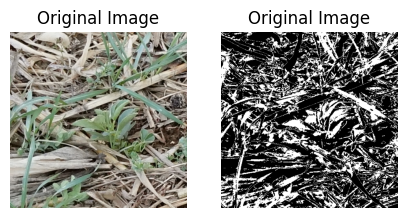

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(5, 10))
n = 99

axs[0].imshow(X_imgs[n])
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(masks[n], cmap='gray', vmin=0, vmax=1)
axs[1].set_title('Original Image')
axs[1].axis('off')

In [149]:
n = 5

(-0.5, 511.5, 511.5, -0.5)

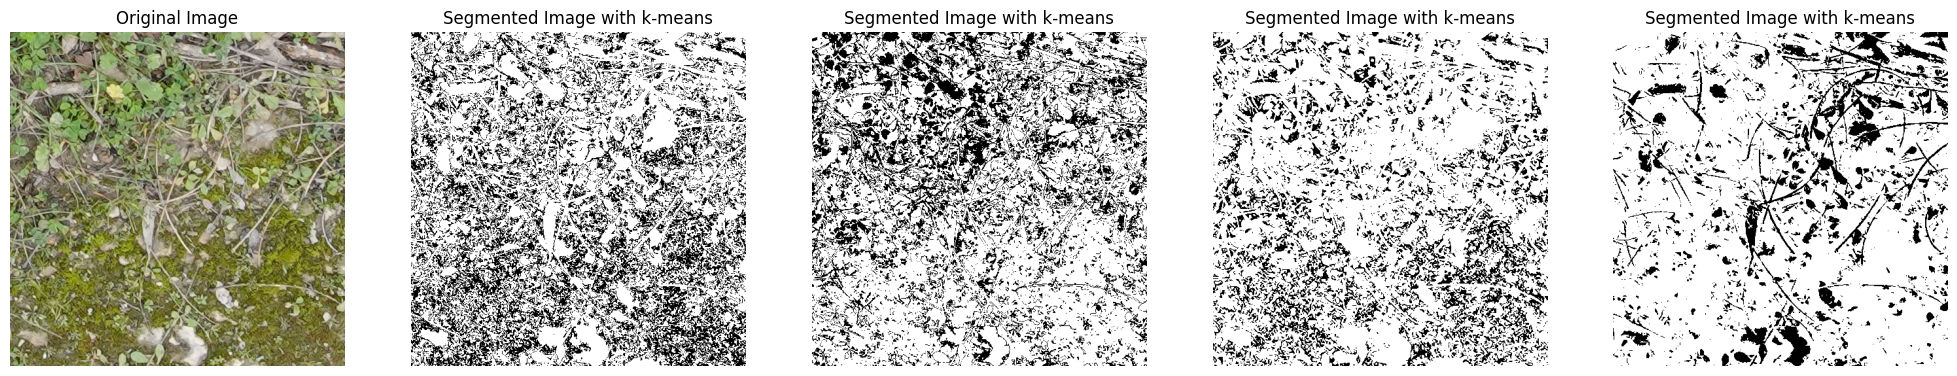

In [150]:
# Se muestra la imagen original, la imagen segmentada y el histograma de la imagen segmentada
fig, axs = plt.subplots(1, 5, figsize=(25, 10))
axs[0].imshow(X_imgs[n])
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(np.where(masks[n] != 0, 1,0).astype(np.uint8), cmap = 'gray')
axs[1].set_title('Segmented Image with k-means')
axs[1].axis('off')

axs[2].imshow(np.where(masks[n] != 1, 1,0).astype(np.uint8), cmap = 'gray')
axs[2].set_title('Segmented Image with k-means')
axs[2].axis('off')

axs[3].imshow(np.where(masks[n] != 2, 1,0).astype(np.uint8), cmap = 'gray')
axs[3].set_title('Segmented Image with k-means')
axs[3].axis('off')

axs[4].imshow(np.where(masks[n] != 3, 1,0).astype(np.uint8), cmap = 'gray')
axs[4].set_title('Segmented Image with k-means')
axs[4].axis('off')

# R,G,B = img_seg_rgb.T
# ax3.hist(R, bins=np.arange(0,256), color='r', alpha=0.5);
# ax3.hist(G, bins=np.arange(0,256), color='g', alpha=0.5);
# ax3.hist(B, bins=np.arange(0,256), color='b', alpha=0.5);

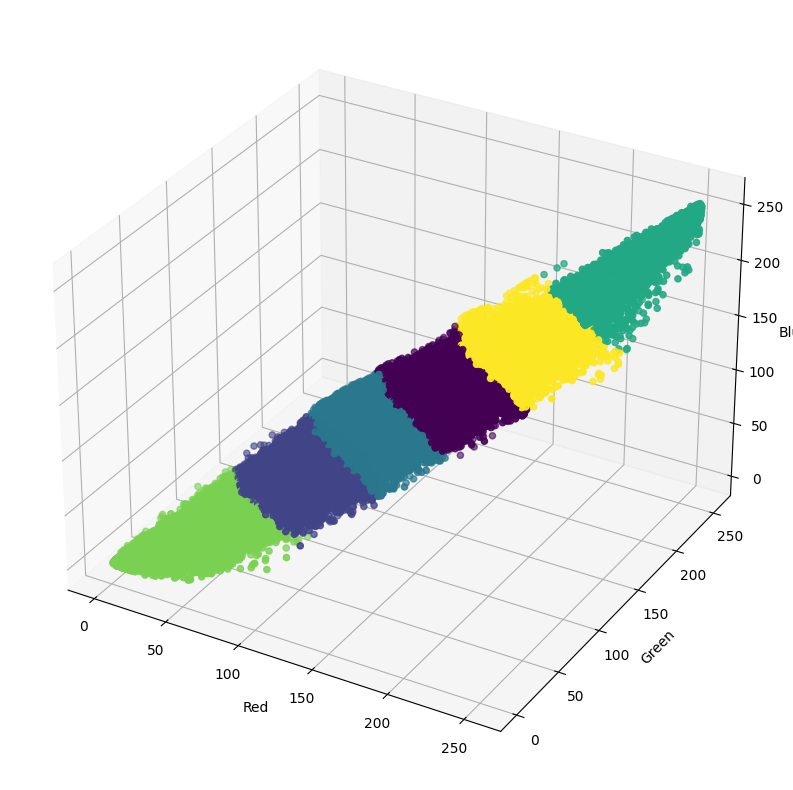

In [86]:
# Pixeles en el espacio RGB segmentados
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], model.cluster_centers_[:,2], marker='x', s=100, color='k', zorder=1)
ax.scatter(X_imgs_rgb[0][:,0], X_imgs_rgb[0][:,1], X_imgs_rgb[0][:,2], c=model.labels_, zorder=-1)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue');